# Classification models

In [72]:
import numpy as np
import pandas as pd
from collections import Counter
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [73]:
FullTable = pd.read_csv('/Users/olgafrolova/Documents/Data-science(introduction)/datasets/wineQuality.csv')
FullTable

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


<BarContainer object of 6 artists>

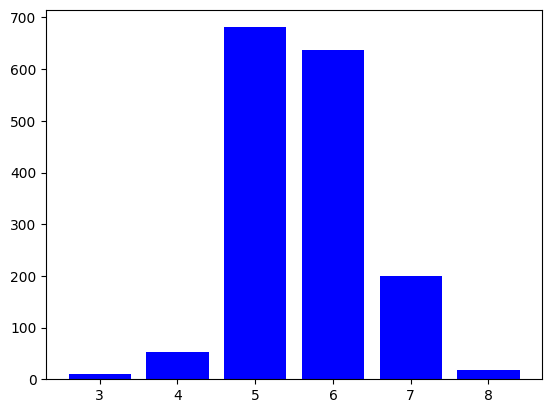

In [74]:
info = dict(Counter(FullTable['quality']))
value_info = list(info.values())

plt.bar(info.keys(), value_info,color='b')

In [75]:
X = FullTable.drop(['quality'],axis=1)
y = FullTable['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [76]:
metric_result = pd.DataFrame(index=['KNN', 'Dicision Tree', 'Logistic Regression'], columns=['Accuracy', 'Recall', 'Precision', 'F1', 'ROC AUC'])

def metrics_print_multiclass(y_test, y_pred, y_prob):
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred, average='macro'))
    print("Precision:", precision_score(y_test, y_pred, average='macro'))
    print("F1:", f1_score(y_test, y_pred, average='macro'))
    print("ROC AUC:", roc_auc_score(y_test, y_prob, multi_class="ovo", average="macro"))


def metrics_print(y_test, y_pred, y_prob):
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred, average='macro'))
    print("Precision:", precision_score(y_test, y_pred, average='macro'))
    print("F1:", f1_score(y_test, y_pred, average='macro'))
    print("ROC AUC:", roc_auc_score(y_test, y_prob[:,1], average="macro"))
  
def metric_result_write(y_test,y_pred,y_prob,row):
    metric_result["Accuracy"][row] = accuracy_score(y_test, y_pred)
    metric_result["Recall"][row] = recall_score(y_test, y_pred, average='macro')
    metric_result["Precision"][row] = precision_score(y_test, y_pred, average='macro')
    metric_result["F1"][row] = f1_score(y_test, y_pred, average='macro')
    metric_result["ROC AUC"][row] = roc_auc_score(y_test, y_prob[:,1], average="macro")

In [77]:
#parameter selection
param_grid = {
    'n_neighbors': list(range(1, 10, 1)),
    'leaf_size': list(range(1, 15, 1)),
}
grid = GridSearchCV(KNeighborsClassifier(algorithm='auto',  p=1, weights='uniform'), param_grid=param_grid, cv=5, scoring='roc_auc_ovo', 
                    verbose=0)
grid.fit(X_train, y_train)
y_pred = grid.predict(X_test)
y_prob = grid.predict_proba(X_test)

print(grid.best_params_)

param_grid = {
    'criterion': ['entropy'],
    'splitter': ['best'],
    'max_depth': list(range(3,1000)),
    'min_samples_split': [0.1],
    'min_samples_leaf' : [1],
    'min_weight_fraction_leaf': [0.0],
    'max_features' : ['log2'],
    'random_state': [1],
    #'max_leaf_nodes': list(range(2, 1000, 1)),
    'min_impurity_decrease': [0.001],
    'ccp_alpha': [0.001],
}
grid = GridSearchCV(DecisionTreeClassifier(), param_grid=param_grid, cv=5, scoring='roc_auc_ovo', 
                    verbose=0)
grid.fit(X_train, y_train)
y_pred = grid.predict(X_test)
y_prob = grid.predict_proba(X_test)

print(grid.best_params_)

param_grid = {
    'fit_intercept': [False],
    #'C': list(range(1, 10000000, 10000)),
    'warm_start': [True],
    'max_iter' : [1000],
    'solver' : ['newton-cg'],
    'random_state': list(range(1, 100, 1)),
    'penalty': [None],
}
grid = GridSearchCV(LogisticRegression(), param_grid=param_grid, cv=5, scoring='roc_auc_ovo', 
                    verbose=0)
grid.fit(X_train, y_train)
y_pred = grid.predict(X_test)
y_prob = grid.predict_proba(X_test)

print(grid.best_params_)

{'leaf_size': 1, 'n_neighbors': 3}
{'ccp_alpha': 0.001, 'criterion': 'entropy', 'max_depth': 9, 'max_features': 'log2', 'min_impurity_decrease': 0.001, 'min_samples_leaf': 1, 'min_samples_split': 0.1, 'min_weight_fraction_leaf': 0.0, 'random_state': 1, 'splitter': 'best'}
{'fit_intercept': False, 'max_iter': 1000, 'penalty': None, 'random_state': 1, 'solver': 'newton-cg', 'warm_start': True}


In [78]:
knn = KNeighborsClassifier(n_neighbors=9, algorithm='auto', leaf_size=1, p=1, weights='uniform')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
y_prob = knn.predict_proba(X_test)
print("KNN")
metrics_print_multiclass(y_test, y_pred, y_prob)
print(metrics.classification_report(y_test, y_pred, digits=3, zero_division = 0))
print()

dtc = DecisionTreeClassifier(ccp_alpha = 0.001, criterion = 'entropy', max_depth = 7, max_features = 'log2', min_impurity_decrease = 0.001, min_samples_leaf = 1, min_samples_split = 0.1, min_weight_fraction_leaf = 0.0, random_state = 1, splitter = 'best')
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)
y_prod = dtc.predict_proba(X_test)
print("DTC")
metrics_print_multiclass(y_test, y_pred, y_prob)
print(metrics.classification_report(y_test, y_pred, digits=3, zero_division = 0))
print()

lr = LogisticRegression(fit_intercept = False, max_iter = 1000, penalty = None, random_state = 1, solver = 'newton-cg', warm_start = True)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
y_prod = lr.predict_proba(X_test)
print("LR")
metrics_print_multiclass(y_test, y_pred, y_prob)
print(metrics.classification_report(y_test, y_pred, digits=3, zero_division = 0))
print()

KNN
Accuracy: 0.4875
Recall: 0.22789522058823528
Precision: 0.2516553971734893
F1: 0.23087817815779954
ROC AUC: 0.647865917910725
              precision    recall  f1-score   support

           3      0.000     0.000     0.000         2
           4      0.000     0.000     0.000        11
           5      0.515     0.647     0.573       136
           6      0.445     0.445     0.445       128
           7      0.550     0.275     0.367        40
           8      0.000     0.000     0.000         3

    accuracy                          0.487       320
   macro avg      0.252     0.228     0.231       320
weighted avg      0.466     0.487     0.468       320


DTC
Accuracy: 0.528125
Recall: 0.2501685049019608
Precision: 0.24265908510094558
F1: 0.24565422359623093
ROC AUC: 0.647865917910725
              precision    recall  f1-score   support

           3      0.000     0.000     0.000         2
           4      0.000     0.000     0.000        11
           5      0.596     0.6

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


LR
Accuracy: 0.621875
Recall: 0.3079670788770053
Precision: 0.47735507246376807
F1: 0.32362173269932826
ROC AUC: 0.647865917910725
              precision    recall  f1-score   support

           3      0.000     0.000     0.000         2
           4      1.000     0.091     0.167        11
           5      0.667     0.765     0.712       136
           6      0.572     0.617     0.594       128
           7      0.625     0.375     0.469        40
           8      0.000     0.000     0.000         3

    accuracy                          0.622       320
   macro avg      0.477     0.308     0.324       320
weighted avg      0.625     0.622     0.605       320




/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<b>Note:</b>

All three models have almost the same ROC AUC (~0.59), which indicates that all models are similar in terms of quality. In this task it is very important for us not to make a mistake with the quality of wine, so the main metric for us will be presicion, as we can see the share of objects called "positive" by the classifier and being such. Based on this metric, the best model is Logistic Regression. All models had difficulties in predicting classes "3", "4" and "8".


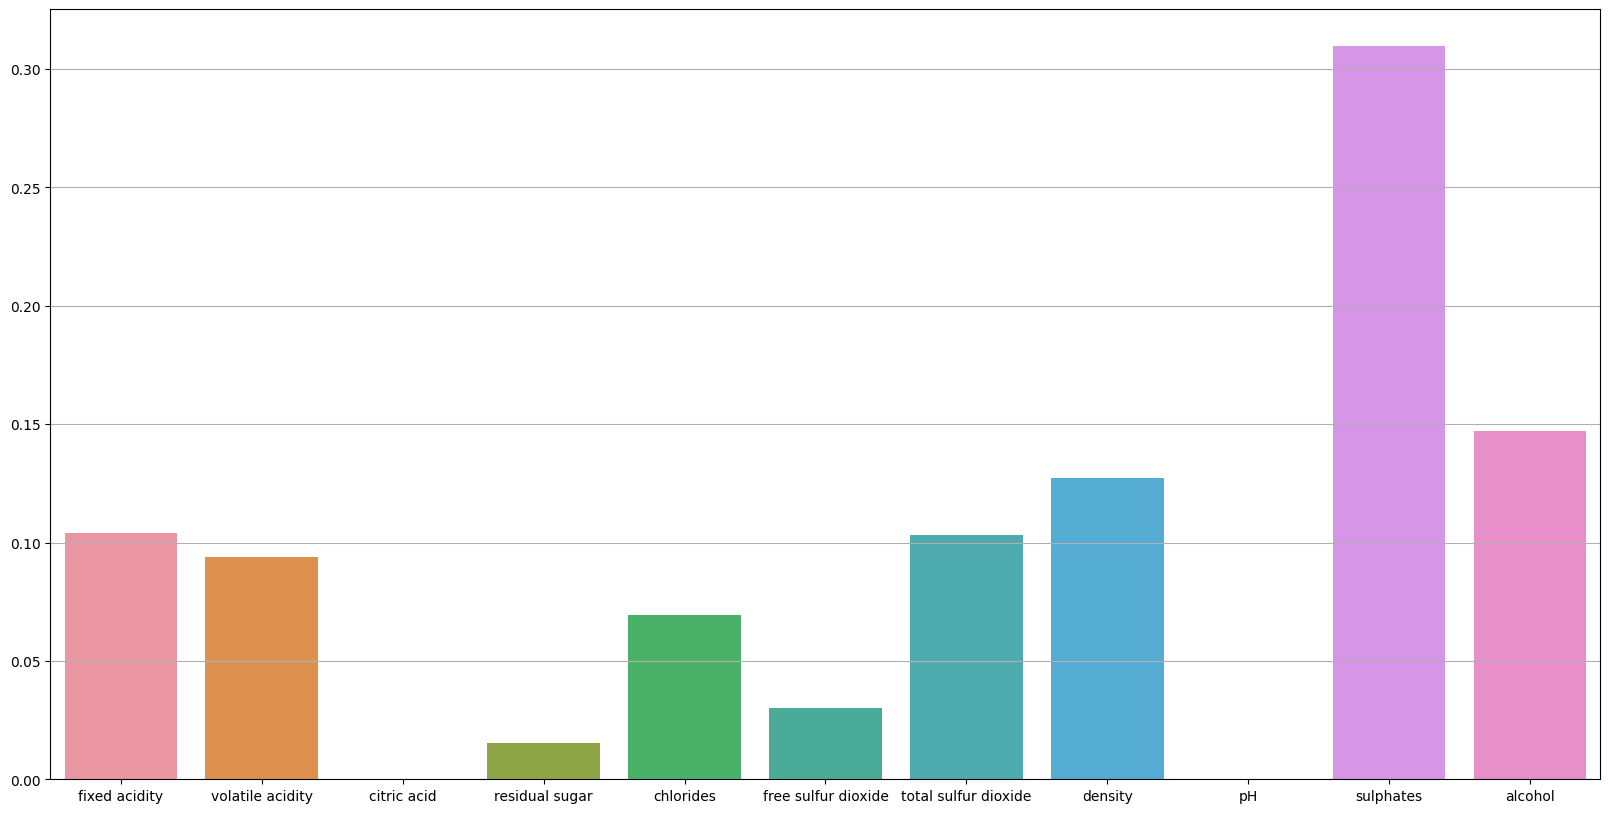

In [79]:
# Histogram of trait importance
x = ['fixed acidity',	'volatile acidity',	'citric acid',	'residual sugar',	'chlorides',	'free sulfur dioxide',	'total sulfur dioxide',	'density',	'pH',	'sulphates',	'alcohol']
#print(dtc.feature_importances_)
plt.figure(figsize=(20, 10))
plt.grid()
sns.barplot(x=x, y=dtc.feature_importances_);

<b>Note:</b>

Based on the histogram, we can say that the most important attributes are "volatile acidity", "total sulfur dioxide" and "sulphates". These are the attributes that have the greatest influence on the qualification of a wine.

In [80]:
#Standardising data and comparing results
scaler = StandardScaler()
scaler.fit(FullTable)
X = FullTable.drop(['quality'],axis=1)
y = FullTable['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

knn = KNeighborsClassifier(n_neighbors=9, algorithm='auto', leaf_size=1, p=1, weights='uniform')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
y_prob = knn.predict_proba(X_test)
print("KNN")
metrics_print_multiclass(y_test, y_pred, y_prob)
print(metrics.classification_report(y_test, y_pred, digits=3, zero_division = 0))
print()

dtc = DecisionTreeClassifier(ccp_alpha = 0.001, criterion = 'entropy', max_depth = 7, max_features = 'log2', min_impurity_decrease = 0.001, min_samples_leaf = 1, min_samples_split = 0.1, min_weight_fraction_leaf = 0.0, random_state = 1, splitter = 'best')
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)
y_prod = dtc.predict_proba(X_test)
print("DTC")
metrics_print_multiclass(y_test, y_pred, y_prob)
print(metrics.classification_report(y_test, y_pred, digits=3, zero_division = 0))
print()

lr = LogisticRegression(fit_intercept = False, max_iter = 1000, penalty = None, random_state = 1, solver = 'newton-cg', warm_start = True)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
y_prod = lr.predict_proba(X_test)
print("LR")
metrics_print_multiclass(y_test, y_pred, y_prob)
print(metrics.classification_report(y_test, y_pred, digits=3, zero_division = 0))
print()

KNN
Accuracy: 0.515625
Recall: 0.23659620098039214
Precision: 0.24583478739041698
F1: 0.23713819819115387
ROC AUC: 0.5823115750798425
              precision    recall  f1-score   support

           3      0.000     0.000     0.000         2
           4      0.000     0.000     0.000        11
           5      0.570     0.662     0.612       136
           6      0.489     0.508     0.498       128
           7      0.417     0.250     0.312        40
           8      0.000     0.000     0.000         3

    accuracy                          0.516       320
   macro avg      0.246     0.237     0.237       320
weighted avg      0.490     0.516     0.499       320


DTC
Accuracy: 0.55
Recall: 0.22242647058823528
Precision: 0.18474780874402982
F1: 0.20114915535515787
ROC AUC: 0.5823115750798425
              precision    recall  f1-score   support

           3      0.000     0.000     0.000         2
           4      0.000     0.000     0.000        11
           5      0.603     0

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


LR
Accuracy: 0.528125
Recall: 0.2411917892156863
Precision: 0.24569484013928458
F1: 0.23971310759199005
ROC AUC: 0.5823115750798425
              precision    recall  f1-score   support

           3      0.000     0.000     0.000         2
           4      0.000     0.000     0.000        11
           5      0.605     0.721     0.658       136
           6      0.469     0.477     0.473       128
           7      0.400     0.250     0.308        40
           8      0.000     0.000     0.000         3

    accuracy                          0.528       320
   macro avg      0.246     0.241     0.240       320
weighted avg      0.495     0.528     0.507       320




/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<b>Note:</b>

There have been small improvements since standardisation. The quality of all models increased by a small percentage. Also the quality of all metrics increased. However, all models have difficulties in predicting "3", "4", "8" classes.

<b>Note:</b>

Summarising the above, we can conclude that all three models have the same quality in terms of ROC AUC. However, we are interested in the metrics of presicion and recall, and Logistic Regression is the best model in terms of these metrics. If we consider each class separately, the best predicted are the classes with a large share in the sample ("5", "6"), the worst predicted are the classes with a smaller share in the sample ("3", "8", "4").

The most important attributes were "volatile acidity", "total sulfur dioxide" and "sulphates". This can be explained by the fact that these attributes are the most important in wine selection. For example, acidity is responsible for both positive and negative taste sensations. Positive descriptors of acidic taste describe the product as "fresh", "light", "mouth moisturising". Negative ones are described as "acrid", "sour", "nauseating". In turn, the presence of sulphate in drinks is not dangerous, harm can be only from their quantity, so this feature also strongly affects the quality, the less, the better the quality of wine. Sulphur dioxide in wine acts as an antibiotic and antioxidant, which protects the alcoholic beverage from oxidation and spoilage by bacteria. Simply put, sulphur oxide prevents residual or added sugar from fermenting and also prevents the wine from turning into vinegar.And as we know, the longevity of wine is very valuable.

After standardising the dataset, we got an improvement in performance.This is due to the fact that this dataset contains unbalanced classes, standardisation allows us to solve this problem, which results in improved performance in all models.

In [81]:
# Replace the 'quality' attribute with the 'quality>6.5' attribute. You should get a binary attribute - a positive wine quality class 7-8 and a negative wine quality class 3-6.
FullTable2 = pd.read_csv('/Users/olgafrolova/Documents/Data-science(introduction)/datasets/wineQuality.csv')
FullTable2.loc[(FullTable2.quality <= 6), ('quality')] = 0
FullTable2.loc[(FullTable2.quality >6), ('quality')] = 1

X = FullTable2.drop(['quality'],axis=1)
y = FullTable2['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)
FullTable2.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,0.135710
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.342587
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,0.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,0.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,0.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,0.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,1.000000


In [82]:
metric_result = pd.DataFrame(index =['KNN', 'Dicision Tree', 'Logistic Regression'], columns =['Accuracy', 'Recall', 'Precision', 'F1', 'ROC AUC']) 
#print(metric_result)

### KNN

In [83]:
param_grid = {
    'n_neighbors': list(range(1, 10, 1)),
    'leaf_size': list(range(1, 15, 1)),
}
grid = GridSearchCV(KNeighborsClassifier(algorithm='auto',  p=1, weights='uniform'), param_grid=param_grid, cv=5, scoring='f1', 
                    verbose=0)
grid.fit(X_train, y_train)
y_pred = grid.predict(X_test)
y_prob = grid.predict_proba(X_test)

print(grid.best_params_)

{'leaf_size': 1, 'n_neighbors': 1}


In [84]:
knn = KNeighborsClassifier(n_neighbors=1, algorithm='auto', leaf_size=1, p=1, weights='uniform')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
y_prob = knn.predict_proba(X_test)
metrics_print(y_test, y_pred, y_prob)
metric_result_write(y_test, y_pred, y_prob, 'KNN')

Accuracy: 0.88125
Recall: 0.744773738560994
Precision: 0.744773738560994
F1: 0.744773738560994
ROC AUC: 0.7447737385609942


### Decision Tree

In [85]:
param_grid = {
    'criterion': ['entropy'],
    'splitter': ['best'],
    'max_depth': list(range(3,1000)),
    'min_samples_split': [0.1],
    'min_samples_leaf' : [1],
    'min_weight_fraction_leaf': [0.0],
    'max_features' : ['log2'],
    'random_state': [1],
    #'max_leaf_nodes': list(range(2, 1000, 1)),
    'min_impurity_decrease': [0.001],
    'ccp_alpha': [0.001],
}
grid = GridSearchCV(DecisionTreeClassifier(), param_grid=param_grid, cv=5, scoring='f1', 
                    verbose=0)
grid.fit(X_train, y_train)
y_pred = grid.predict(X_test)
y_prob = grid.predict_proba(X_test)

print(grid.best_params_)

{'ccp_alpha': 0.001, 'criterion': 'entropy', 'max_depth': 4, 'max_features': 'log2', 'min_impurity_decrease': 0.001, 'min_samples_leaf': 1, 'min_samples_split': 0.1, 'min_weight_fraction_leaf': 0.0, 'random_state': 1, 'splitter': 'best'}


In [86]:
dtc = DecisionTreeClassifier(criterion='entropy', max_features='log2', splitter='best', max_depth=5, min_samples_leaf=1, random_state=956, min_samples_split=0.01, min_weight_fraction_leaf=0.0, ccp_alpha=0.001, min_impurity_decrease=0.001)
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)
y_prod = dtc.predict_proba(X_test)
metrics_print(y_test, y_pred, y_prob)
metric_result_write(y_test, y_pred, y_prob, 'Dicision Tree')

Accuracy: 0.871875
Recall: 0.6804214591554025
Precision: 0.7209995886466475
F1: 0.6973541556134807
ROC AUC: 0.7864578960624632


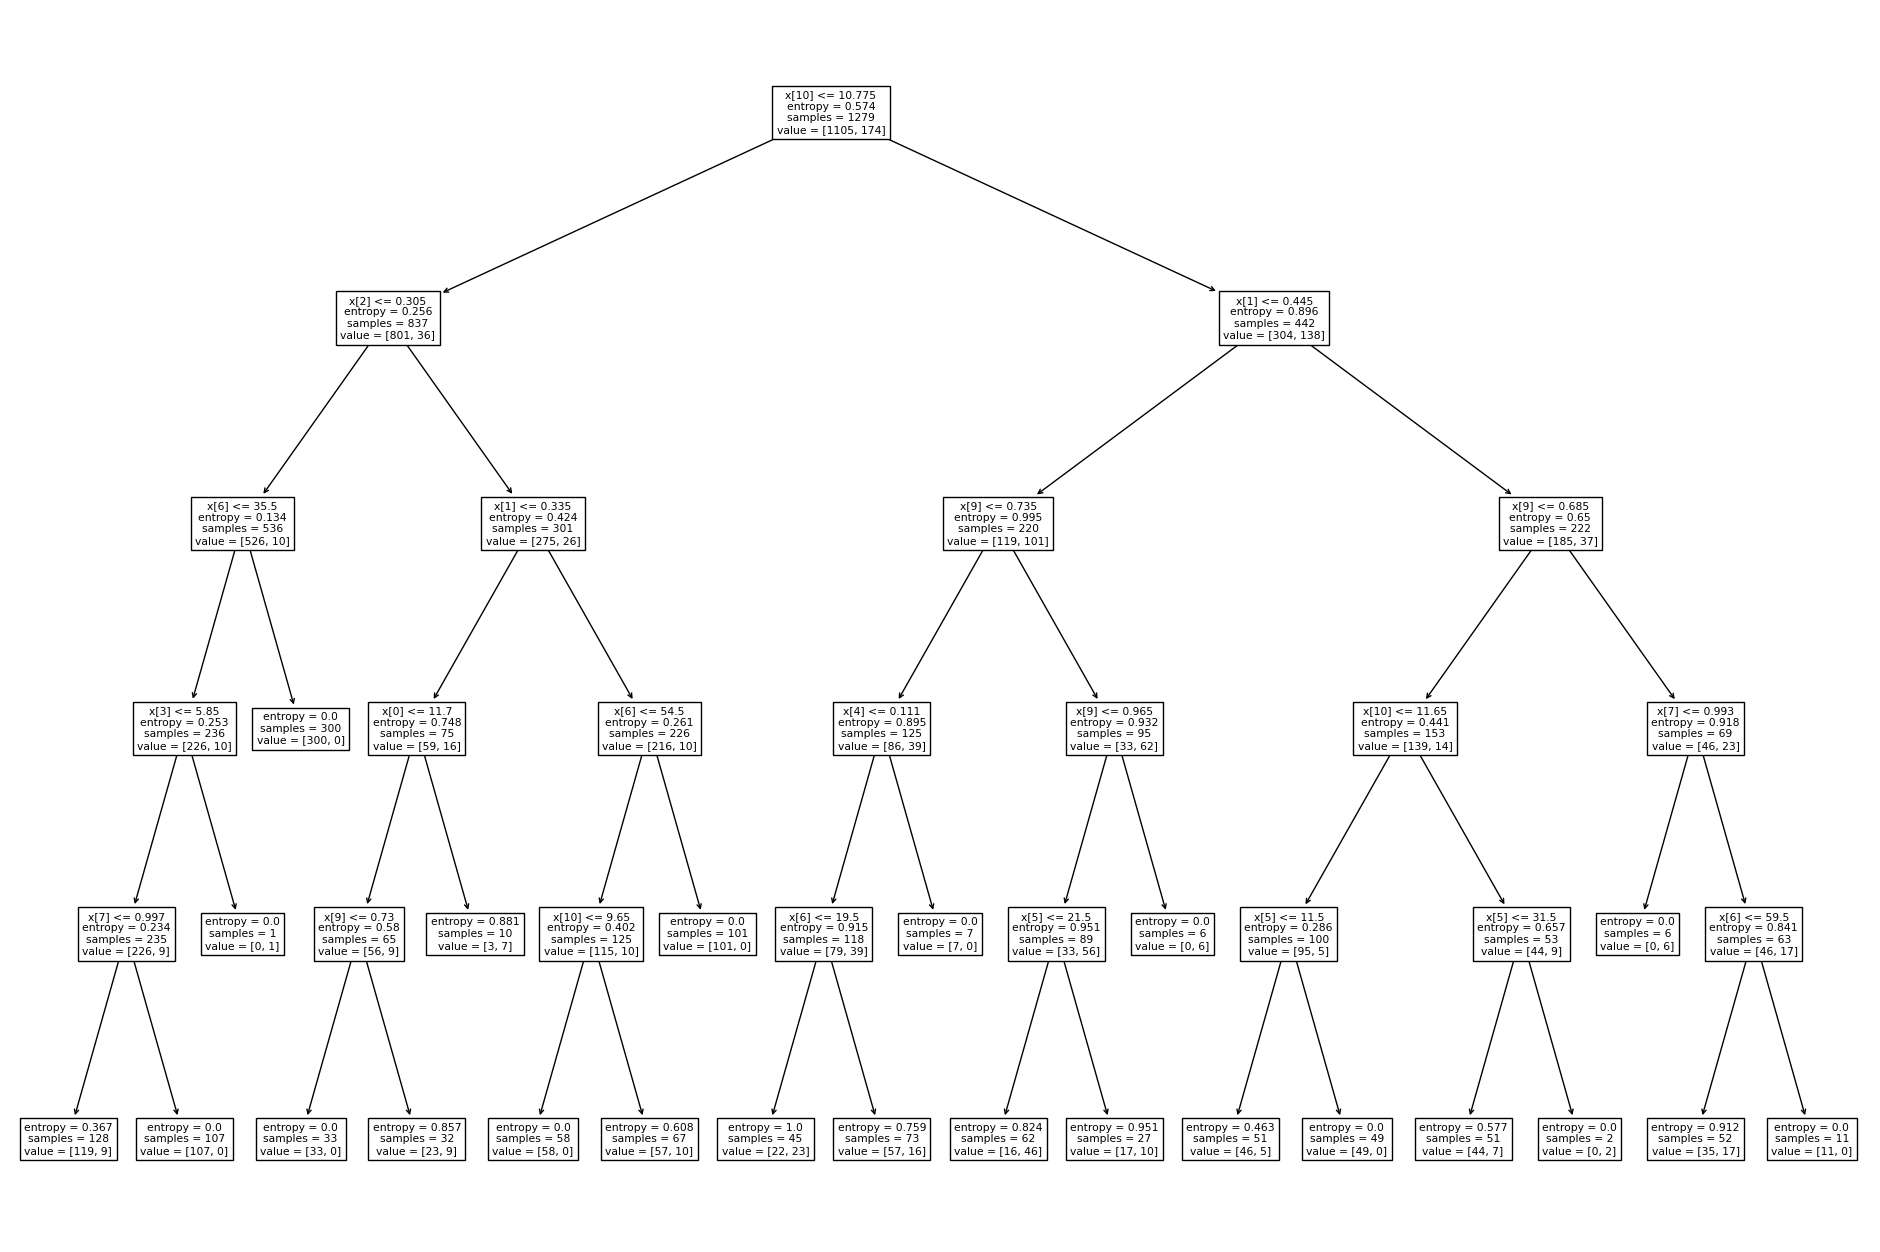

In [87]:
plt.figure(figsize=(24, 16))
plot_tree(dtc)
plt.show()

[0.0287645  0.13599618 0.04446042 0.01393813 0.01176796 0.05524017
 0.10249797 0.05557067 0.         0.13847334 0.41329066]


<Axes: >

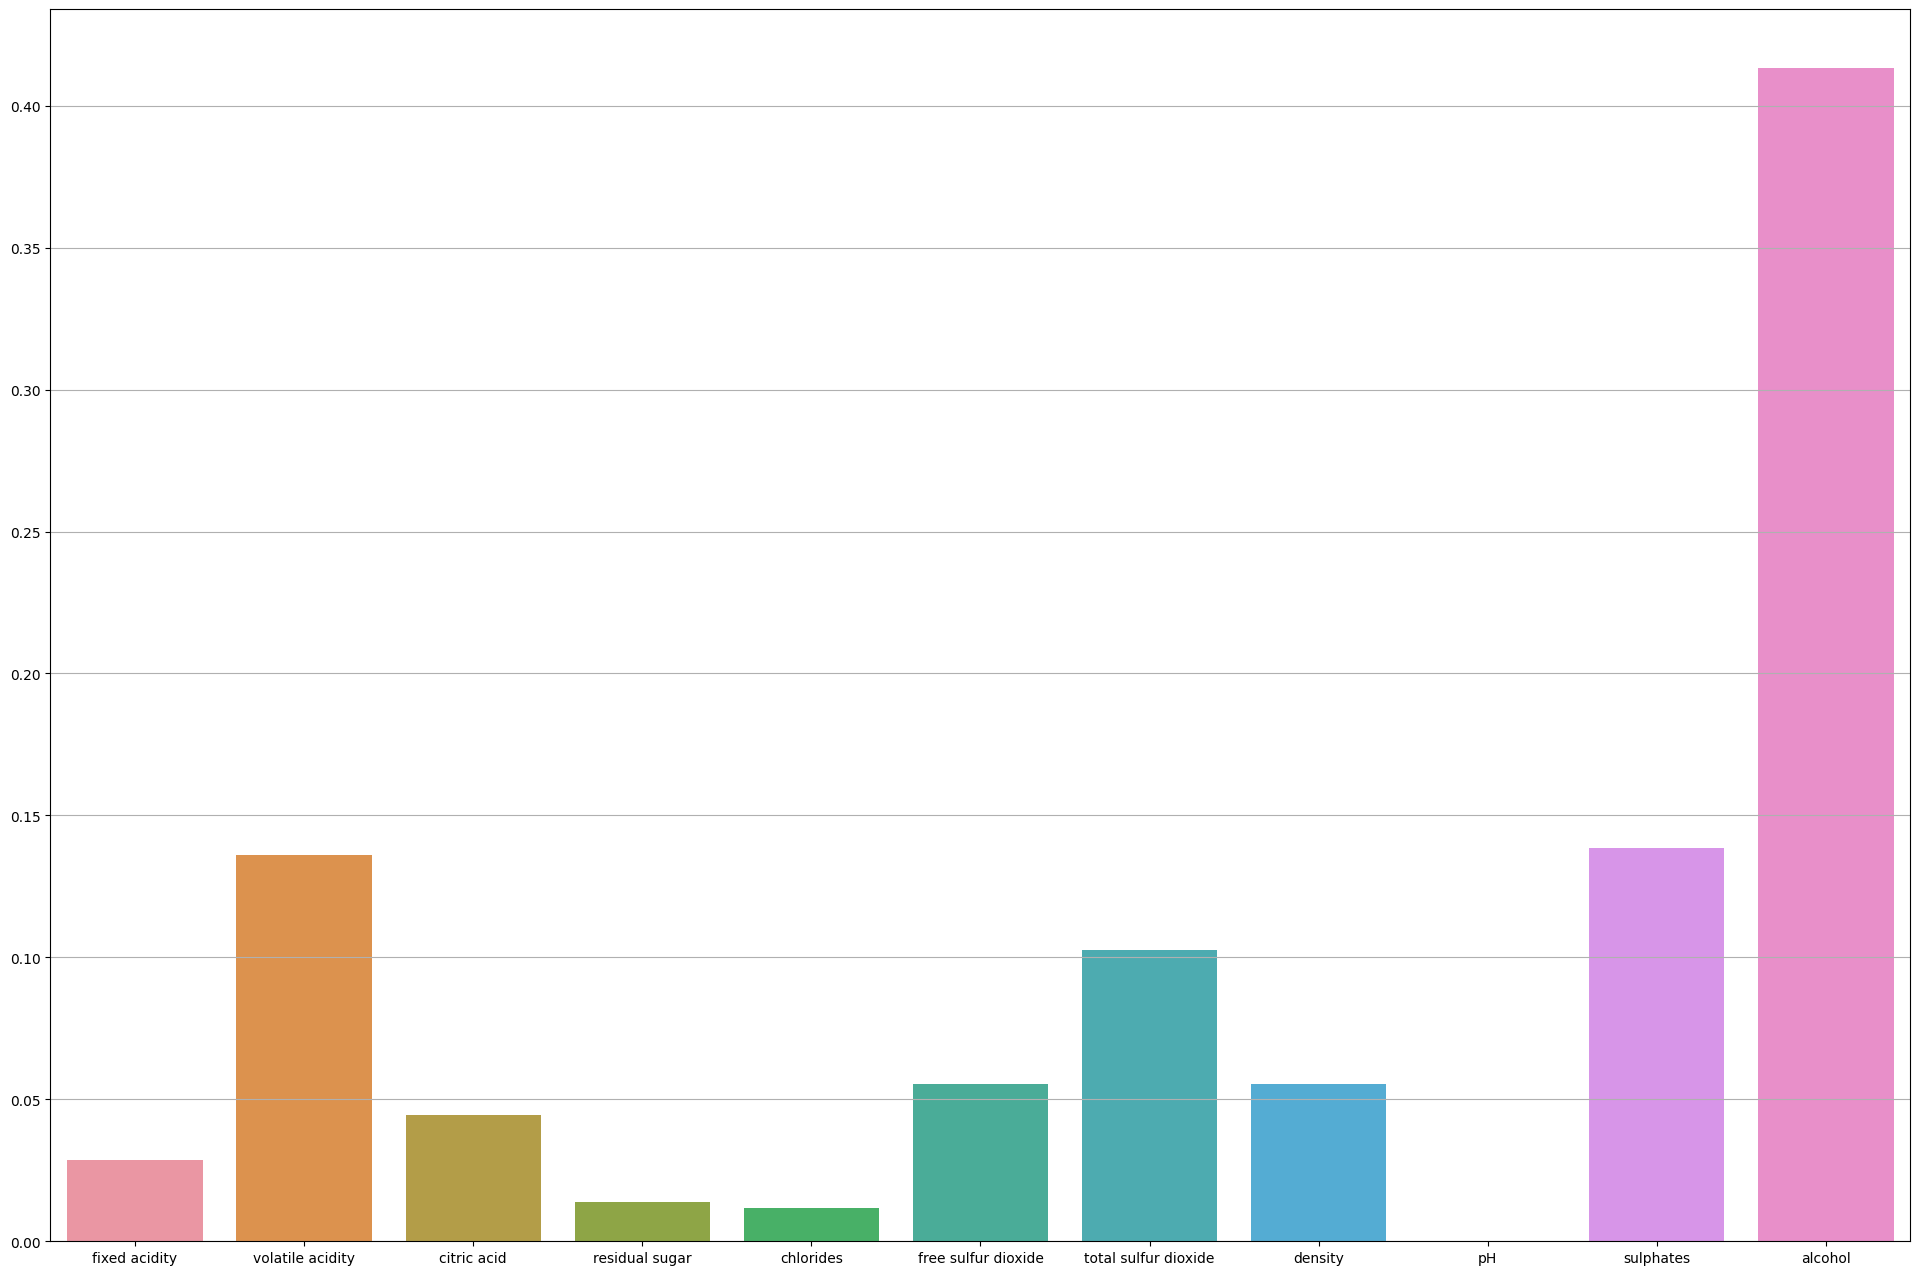

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns

x = ['fixed acidity',	'volatile acidity',	'citric acid',	'residual sugar',	'chlorides',	'free sulfur dioxide',	'total sulfur dioxide',	'density',	'pH',	'sulphates',	'alcohol']
print(dtc.feature_importances_)
plt.figure(figsize=(24, 16))
plt.grid()
sns.barplot(x=x, y=dtc.feature_importances_)

### Logistic Regression

In [89]:
param_grid = {
    'penalty': [None],
    'fit_intercept': [False],
    #'C': list(range(1, 10000000, 10000)),
    'warm_start': [True],
    'max_iter' : [100],
    'solver' : ['newton-cg'],
    'random_state': list(range(1, 100, 1)),
}
grid = GridSearchCV(LogisticRegression(), param_grid=param_grid, cv=5, scoring='f1', 
                    verbose=0)
grid.fit(X_train, y_train)
y_pred = grid.predict(X_test)
y_prob = grid.predict_proba(X_test)

print(grid.best_params_)

{'fit_intercept': False, 'max_iter': 100, 'penalty': None, 'random_state': 1, 'solver': 'newton-cg', 'warm_start': True}


In [90]:
lr = LogisticRegression(solver='newton-cg', penalty=None, fit_intercept=False, warm_start=True, max_iter=100, random_state=1)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
y_prod = lr.predict_proba(X_test)
metrics_print(y_test, y_pred, y_prob)
metric_result_write(y_test, y_pred, y_prob, 'Logistic Regression')

Accuracy: 0.859375
Recall: 0.6044412727730669
Precision: 0.6751126126126126
F1: 0.6249120887708056
ROC AUC: 0.8670976408362018


### Сomparison

In [91]:
metric_result

,Accuracy,Recall,Precision,F1,ROC AUC
KNN,0.88125,0.744774,0.744774,0.744774,0.744774
Dicision Tree,0.871875,0.680421,0.721,0.697354,0.786458
Logistic Regression,0.859375,0.604441,0.675113,0.624912,0.867098


### Note:

After reviewing the assignment, we came to the conclusion that Precision is the more important metric. It's like saying that a wine is good when in fact it is bad. Such a mistake could, for example, have a bad impact on the company's reputation. For example, it would be unacceptable to submit an expectedly good wine for a tasting and get a low score. On the other hand the Recall metric is when we say that a wine is usually/bad, but it is actually good. For regular customers this would be a plus and it would enhance the company's reputation, because even ordinary wine is good. However, for the company itself, selling good and expensive wine at the price of ordinary wine is unacceptable. Thus Recall and Precision are important for us - these two parameters are combined in the F1 metric, which is the harmonic mean of these two parameters. So all the models were built to maximise the quality of the F1 metric.

Based on the results obtained, the best model in terms of F1 is KNN, which showed F1 = 0.74, other models showed less 0.7 on this metric. However, KNN loses on the overall quality of the model defined by the ROC AUC metric. In summary, following the overall quality of predictions we choose KNN as the main model. If we care about the overall quality of the model, we can choose Logistic Regression, which has similar Precision and Accuracy, higher ROC AUC, the only thing that can affect the quality of predictions is low Recall, which increases the probability of erroneous predictions, which we should avoid when choosing wine.


## Standardisation

In [92]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(FullTable2)
X = FullTable2.drop(['quality'],axis=1)
y = FullTable2['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

knn = KNeighborsClassifier(n_neighbors=1, algorithm='auto', leaf_size=1, p=1, weights='uniform')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
y_prob = knn.predict_proba(X_test)
print("KNN")
metrics_print(y_test, y_pred, y_prob)
print()

dtc = DecisionTreeClassifier(criterion='entropy', max_features='log2', splitter='best', max_depth=5, min_samples_leaf=1, random_state=956, min_samples_split=0.01, min_weight_fraction_leaf=0.0, ccp_alpha=0.001, min_impurity_decrease=0.001)
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)
y_prod = dtc.predict_proba(X_test)
print("DTC")
metrics_print(y_test, y_pred, y_prob)
print()

lr = LogisticRegression(solver='newton-cg', penalty=None, fit_intercept=False, warm_start=True, max_iter=100, random_state=1)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
y_prod = lr.predict_proba(X_test)
print("LR")
metrics_print(y_test, y_pred, y_prob)
print()

KNN
Accuracy: 0.875
Recall: 0.7509864830828645
Precision: 0.7329904138414777
F1: 0.7414141414141413
ROC AUC: 0.7509864830828646

DTC
Accuracy: 0.88125
Recall: 0.666190915960037
Precision: 0.7502212109720642
F1: 0.6952380952380952
ROC AUC: 0.7509864830828646

LR
Accuracy: 0.8875
Recall: 0.6599781714381664
Precision: 0.778948909383692
F1: 0.6959138422553057
ROC AUC: 0.7509864830828646



<b>Note:</b>

After standardisation, the results changed. So all three models have the same quality in the ROC AUC metric, which allows them to be compared on other metrics. Accuracy is approximately the same. However, the overall accuracy of the model is better for KNN - the high F1 score makes this model optimal for standardised data. For higher Precision, the Logistic Regression model can be used.